In [5]:
# pip install PyTDC

In [6]:
# pip install umap-learn

In [7]:
import seaborn as sns
from tdc.multi_pred import DTI
import pandas as pd
import numpy as np

# Drug-Target Interaction Prediction

Determining how well a small-molecule drug binds to a new target protein typically involves screening various compounds to gauge their effectiveness. Traditional methods for this rely on costly and time-consuming high-throughput wet-lab experiments. Unfortunately, these methods struggle when handling a large number of candidate compounds due to their resource-intensive nature. To tackle this challenge, drug-target interaction (DTI) prediction tasks employ computational methods that work virtually, using available structural data of compounds and protein amino acid sequences. By doing so, these computational models aim to predict how well a drug interacts with a target protein without the need for expensive lab experiments. Using techniques like machine learning and molecular modeling, these models offer a cost-effective and efficient means to forecast potential drug-target interactions. This advancement in predictive modeling holds great potential for accelerating drug discovery by quickly identifying promising compounds for further experimental exploration, potentially saving time and resources in the early stages of drug development.

# Dataset : KIBA

The chosen dataset is KIBA, which fulfills the requirements of the task as it involves supervised machine learning in a regression model. It contains at least two types of input variables: protein sequences and chemical compounds (drugs).

KIBA provides information on the binding of kinase inhibitors to target proteins, used for predicting Compound-Protein Interactions. The KIBA (Kinase Inhibitor Bioactivity) dataset is a specialized dataset curated specifically for studying the interactions between kinase inhibitors and their target kinases. Kinases are a class of enzymes involved in cellular signaling pathways and are significant targets in drug discovery, particularly in cancer treatment and other diseases related to aberrant signaling pathways.Kinases are a class of enzymes involved in cellular signaling pathways and are significant targets in drug discovery, particularly in cancer treatment and other diseases related to aberrant signaling pathway.

References:

- Tang J, Szwajda A, Shakyawar S, et al. Making sense of large-scale kinase inhibitor bioactivity data sets: a comparative and integrative analysis. J Chem Inf Model. 2014;54(3):735-743.

- Huang, Kexin, et al. “DeepPurpose: a Deep Learning Library for Drug-Target Interaction Prediction” Bioinformatics.

In [8]:
data_K = DTI(name = 'KIBA')

Found local copy...
Loading...
Done!


## Preprocessing

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

In [9]:
data = data_K.get_data()

In [10]:
data_K.print_stats()
print()
print("Binding affinity mean:", data_K.y.mean())

--- Dataset Statistics ---
2068 unique drugs.
229 unique targets.
117657 drug-target pairs.
--------------------------



Binding affinity mean: 11.720685064256795


### Distribution of binding affinity values

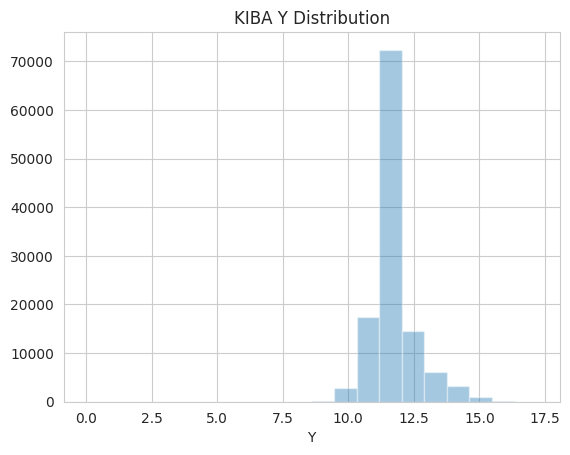

In [11]:
sns.set_style("whitegrid")
Y_plot = sns.distplot(data.Y, kde=False, bins=20).set_title('KIBA Y Distribution')

In [12]:
data.Y.value_counts()

11.200000    15036
11.100000    11881
11.900001     9945
11.300000     8344
11.500000     7573
             ...  
11.803335        1
12.409894        1
12.228427        1
11.035542        1
0.000000         1
Name: Y, Length: 2865, dtype: int64

Drugs smiles lenght distribution

Text(0.5, 1.0, 'KIBA Drug Length Distribution')

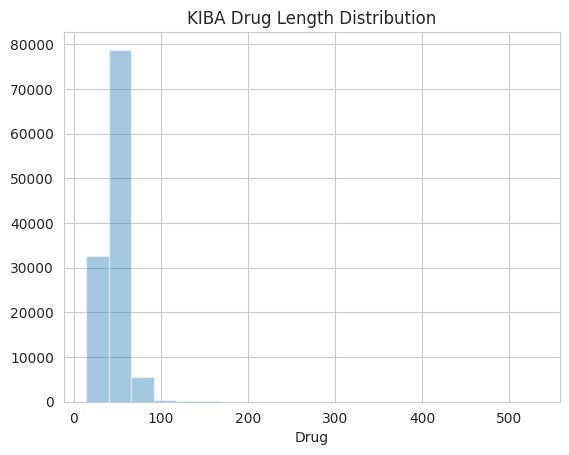

In [13]:
sns.distplot(data.Drug.str.len(), kde=False, bins=20).set_title('KIBA Drug Length Distribution')

Protein aa lengths distribution

Text(0.5, 1.0, 'KIBA Target Length Distribution')

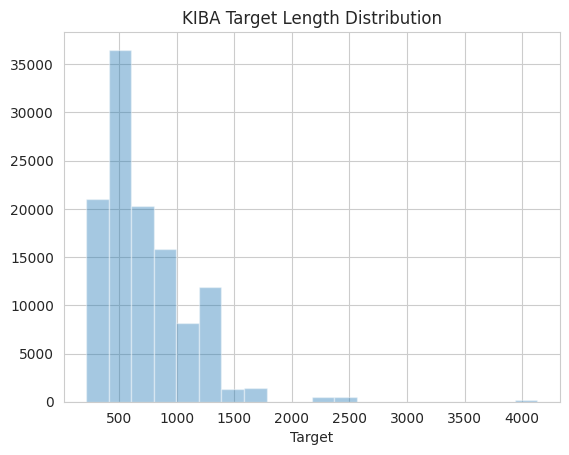

In [14]:
sns.distplot(data.Target.str.len(), kde=False, bins=20).set_title('KIBA Target Length Distribution')

## Data binarization
 We binarize the y variable (binding affinity) by applying as a treshold the value of 12.1, which, according to literature represents the minimum value where the kinases seem to have some effect on the activity of enzymes. With this, values below the treshold will be represented as "0" and values above the treshold will be represented as "1".

- Hakime Öztürk, Arzucan Özgür, Elif Ozkirimli, DeepDTA: deep drug–target binding affinity prediction, Bioinformatics, Volume 34, Issue 17, September 2018, Pages i821–i829, https://doi.org/10.1093/bioinformatics/bty593

In [15]:
data_binarized = data_K.binarize(threshold = 12.1, order ='ascending')

Binariztion using threshold 12.1, default, we assume the smaller values are 1 and larger ones is 0, you can change the order by 'binarize(order = 'ascending')'


In [16]:
data_binarized.get_data()

,Drug_ID,Drug,Target_ID,Target,Y
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,0
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,0
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,0
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,0
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,0
...,...,...,...,...,...
117652,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,0
117653,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,0
117654,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,0
117655,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,0


In [17]:
data_binarized.get_data().Y.value_counts()

0    95091
1    22566
Name: Y, dtype: int64

#### Conclusion: The obtained binarized dataset has 95091 DTI with seemingly no inhibition and 22566 with some degree of activity inhibition

In [18]:
df_binarized = data_binarized.get_data(format = 'df')
df_binarized.to_csv('KIBA_binarized.csv', index = False)
df_binarized

,Drug_ID,Drug,Target_ID,Target,Y
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,0
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,0
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,0
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,0
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,0
...,...,...,...,...,...
117652,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,0
117653,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,0
117654,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,0
117655,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,0


## Drugs descriptors  

The drug descriptors used in the KIBA dataset typically include a wide range of molecular properties or features that describe the chemical structure of the compounds. These descriptors serve as the input variables for machine learning models aiming to predict interactions between compounds and target proteins. The drug descriptors used are:

- **2D Descriptors:**

- **Morgan Fingerprints:**


In [19]:
descriptors_smiles = pd.read_csv("drugs_descriptors_smiles.csv")
# descriptors_smiles = pd.read_csv("https://raw.githubusercontent.com/BrunoAGSa/SIB_Work/main/drugs_descriptors_smiles.csv?token=GHSAT0AAAAAACHXL6AARZCNIW3YHF5UNIVWZM3GDIQ")

In [20]:
descriptors_smiles

,Drug_ID,Drug,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,6.243423,0.517221,6.243423,0.517221,0.749475,340.636993,328.540985,338.998444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL1088633,COc1cc2c(cc1Cl)C(c1cccc(Cl)c1)=NCC2,6.239307,0.599887,6.239307,0.599887,0.805831,306.191986,293.088013,305.037415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL1090360,O=C(Cc1ccccc1)Nc1cccc(-c2nc3sccn3c2-c2ccnc(Nc3...,12.754791,-0.070738,12.754791,0.070738,0.216340,587.708984,558.476990,587.210327,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,CHEMBL1688215,Nc1nccc(-c2ccc3c(N)n[nH]c3c2)n1,5.701094,0.256224,5.701094,0.256224,0.577312,226.242996,216.162994,226.096695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL1765781,CNc1cncc(-c2c[nH]c(=O)c(NC(=O)c3ccc(N4CCCC4CN4...,12.919469,-0.376600,12.919469,0.165238,0.483859,473.580994,442.333008,473.253937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,CHEMBL2002182,O=c1[nH]nc2c(-c3ccccc3)cccn12,11.407152,-0.215017,11.407152,0.215017,0.665489,211.223999,202.151993,211.074554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2064,CHEMBL1668418,COc1cc(O)c2c(c1)C=CCCCC(=O)C=CCC(C)OC2=O,12.422585,-0.598066,12.422585,0.068241,0.795626,330.380005,308.204010,330.146729,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2065,CHEMBL408982,CCN1C(=CC(C)=O)Sc2ccc(OC)cc21,11.194309,0.074742,11.194309,0.074742,0.770003,249.335007,234.214996,249.082352,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2066,CHEMBL307152,Cn1ccc2ccc3c4[nH]c5c(CCCNC6CCC(O)CC6)cccc5c4c4...,13.124377,-0.327578,13.124377,0.133993,0.210694,494.595001,464.355011,494.231781,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
morgan_fingerprints = pd.read_csv('drugs_morgan_fingerprints.csv')
# morgan_fingerprints = pd.read_csv('https://raw.githubusercontent.com/BrunoAGSa/SIB_Work/main/drugs_morgan_fingerprints.csv?token=GHSAT0AAAAAACHXL6ABDAJ2OYDVH3T343DGZM3GDTA')
morgan_fingerprints

,Drug_ID,Drug,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,...,morgan_1014,morgan_1015,morgan_1016,morgan_1017,morgan_1018,morgan_1019,morgan_1020,morgan_1021,morgan_1022,morgan_1023
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL1088633,COc1cc2c(cc1Cl)C(c1cccc(Cl)c1)=NCC2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL1090360,O=C(Cc1ccccc1)Nc1cccc(-c2nc3sccn3c2-c2ccnc(Nc3...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL1688215,Nc1nccc(-c2ccc3c(N)n[nH]c3c2)n1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL1765781,CNc1cncc(-c2c[nH]c(=O)c(NC(=O)c3ccc(N4CCCC4CN4...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,CHEMBL2002182,O=c1[nH]nc2c(-c3ccccc3)cccn12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2064,CHEMBL1668418,COc1cc(O)c2c(c1)C=CCCCC(=O)C=CCC(C)OC2=O,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2065,CHEMBL408982,CCN1C(=CC(C)=O)Sc2ccc(OC)cc21,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2066,CHEMBL307152,Cn1ccc2ccc3c4[nH]c5c(CCCNC6CCC(O)CC6)cccc5c4c4...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Remove rows with all NaN values from two sets of descriptors ('descriptors_smiles' and 'morgan_fingerprints') and synchronizes corresponding target variables to ensure alignment, resulting in cleaned dataframes and target variables with matching shapes.

In [22]:
# Shape of the dataframes
print(descriptors_smiles.shape, morgan_fingerprints.shape)

# Descriptors smiles

descriptors_smiles = descriptors_smiles.dropna(how='all')

y_descriptors_smiles = df_binarized['Y'].copy()[descriptors_smiles.index]

# Morgan fingerprints

morgan_fingerprints = morgan_fingerprints.dropna(how='all')

y_morgan = df_binarized['Y'].copy()[morgan_fingerprints.index]

descriptors_smiles.shape, y_descriptors_smiles.shape, morgan_fingerprints.shape, y_morgan.shape

(2068, 210) (2068, 1026)


((2068, 210), (2068,), (2068, 1026), (2068,))

In [23]:
# Checking if any of the descriptors have columns with nan values
descriptors_smiles.isna().any().sum(), morgan_fingerprints.isna().any().sum()

(0, 0)

# Protein Descriptors

In [24]:
protein_descriptors = pd.read_csv('protein_descriptors.csv')
# protein_descriptors = pd.read_csv('https://raw.githubusercontent.com/BrunoAGSa/SIB_Work/main/protein_descriptors%20(2).csv?token=GHSAT0AAAAAACK3F3AMXKZRMZQWCEATQ5YEZM3GN6Q')
protein_descriptors = protein_descriptors.drop(columns=['Target'])


# Drug Encondings

In [25]:
# drug_encoding = pd.read_csv('drug_encoding.csv')

# Protein Encodings

In [26]:
protein_encoding = pd.read_csv('protein_encoding.csv')

Join the drug descriptors and morgan fingerprints


In [27]:
descriptors_smiles.shape, morgan_fingerprints.shape

((2068, 210), (2068, 1026))

In [28]:
# join the drug descriptors and morgan fingerprints by Drug_ID and not duplicate Drug column

# descriptors_drugs = descriptors_smiles.merge(morgan_fingerprints, on='Drug_ID', how='left')
# descriptors_drugs = descriptors_drugs.drop(columns='Drug_y')
# descriptors_drugs = descriptors_drugs.rename(columns={'Drug_x': 'Drug'})
descriptors_drugs = descriptors_smiles
descriptors_drugs

,Drug_ID,Drug,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,6.243423,0.517221,6.243423,0.517221,0.749475,340.636993,328.540985,338.998444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL1088633,COc1cc2c(cc1Cl)C(c1cccc(Cl)c1)=NCC2,6.239307,0.599887,6.239307,0.599887,0.805831,306.191986,293.088013,305.037415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL1090360,O=C(Cc1ccccc1)Nc1cccc(-c2nc3sccn3c2-c2ccnc(Nc3...,12.754791,-0.070738,12.754791,0.070738,0.216340,587.708984,558.476990,587.210327,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,CHEMBL1688215,Nc1nccc(-c2ccc3c(N)n[nH]c3c2)n1,5.701094,0.256224,5.701094,0.256224,0.577312,226.242996,216.162994,226.096695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL1765781,CNc1cncc(-c2c[nH]c(=O)c(NC(=O)c3ccc(N4CCCC4CN4...,12.919469,-0.376600,12.919469,0.165238,0.483859,473.580994,442.333008,473.253937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,CHEMBL2002182,O=c1[nH]nc2c(-c3ccccc3)cccn12,11.407152,-0.215017,11.407152,0.215017,0.665489,211.223999,202.151993,211.074554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2064,CHEMBL1668418,COc1cc(O)c2c(c1)C=CCCCC(=O)C=CCC(C)OC2=O,12.422585,-0.598066,12.422585,0.068241,0.795626,330.380005,308.204010,330.146729,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2065,CHEMBL408982,CCN1C(=CC(C)=O)Sc2ccc(OC)cc21,11.194309,0.074742,11.194309,0.074742,0.770003,249.335007,234.214996,249.082352,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2066,CHEMBL307152,Cn1ccc2ccc3c4[nH]c5c(CCCNC6CCC(O)CC6)cccc5c4c4...,13.124377,-0.327578,13.124377,0.133993,0.210694,494.595001,464.355011,494.231781,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Split Dataset

In [29]:
df_binarized_before = df_binarized.copy()
df_binarized_before = df_binarized_before.drop(columns=['Drug', 'Target'])
df_binarized_before

,Drug_ID,Target_ID,Y
0,CHEMBL1087421,O00141,0
1,CHEMBL1087421,O14920,0
2,CHEMBL1087421,O15111,0
3,CHEMBL1087421,P00533,0
4,CHEMBL1087421,P04626,0
...,...,...,...
117652,CHEMBL230654,Q13554,0
117653,CHEMBL230654,Q13555,0
117654,CHEMBL230654,Q13557,0
117655,CHEMBL230654,Q16539,0


In [30]:
from sklearn.model_selection import train_test_split

df_binarized_X_train, df_binarized_X_test, df_binarized_y_train, df_binarized_y_test = train_test_split(df_binarized_before.iloc[:, :2], df_binarized_before.iloc[:, -1], test_size=0.2, random_state=42)


In [31]:
df_binarized_X_train

,Drug_ID,Target_ID
84758,CHEMBL1997623,Q13153
100884,CHEMBL2006299,P51812
3380,CHEMBL383760,P53778
74304,CHEMBL1977374,Q9UEE5
108804,CHEMBL305178,P00533
...,...,...
76820,CHEMBL1999496,Q9H3Y6
110268,CHEMBL1243200,Q06187
103694,CHEMBL436817,P12931
860,CHEMBL208637,P22694


In [32]:
df_binarized_y_train

84758     0
100884    0
3380      0
74304     0
108804    0
         ..
76820     0
110268    0
103694    0
860       0
15795     0
Name: Y, Length: 94125, dtype: int64

In [33]:
df_binarized_X_test

,Drug_ID,Target_ID
42214,CHEMBL1991725,P15735
101540,CHEMBL202635,P35916
60939,CHEMBL2007296,Q96PF2
112702,CHEMBL293750,Q05655
53872,CHEMBL2001477,P49841
...,...,...
68246,CHEMBL497151,P51451
92363,CHEMBL1976376,Q04759
62732,CHEMBL234085,Q9UM73
94839,CHEMBL1984686,P06241


In [34]:
df_binarized_y_test

42214     0
101540    0
60939     0
112702    0
53872     0
         ..
68246     0
92363     0
62732     0
94839     0
97429     0
Name: Y, Length: 23532, dtype: int64

# Join all features

In [ ]:
# join the descriptors_drugs to the data_binarized by Drug_ID

descriptors_all_train = df_binarized_X_train.merge(descriptors_drugs, on='Drug_ID', how='left')
descriptors_all_train = descriptors_all_train.merge(protein_descriptors, on='Target_ID', how='left')

descriptors_all_train

,Drug_ID,Target_ID,Drug,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,CHEMBL1997623,Q13153,Nc1n[nH]c2cc(-c3ccc(NC(=O)Nc4cccc(C(F)(F)F)c4)...,12.777440,-4.477262,12.777440,0.047295,0.359698,411.386993,395.259003,...,0.980,64.216,113.725,200.490,267.157,0.690,119.310,228.276,293.103,368.276
1,CHEMBL2006299,P51812,COc1cccc(CNC(=O)c2ccc(-c3ccncc3)cc2)c1,12.267911,-0.098057,12.267911,0.098057,0.780404,318.376007,300.231995,...,0.743,81.041,142.751,216.357,274.721,0.431,75.000,153.879,235.345,318.966
2,CHEMBL383760,P53778,CNC(=O)C1CCCN1Cc1cc2c(Nc3cccc(Cl)c3F)ncnc2cc1OC,14.405849,-0.546157,14.405849,0.013312,0.601465,443.910004,420.726013,...,1.575,48.031,140.157,215.748,288.189,0.862,87.931,150.000,225.862,316.379
3,CHEMBL1977374,Q9UEE5,CC(C)c1nnc2ccc(-c3c(-c4ccc(F)cc4F)nc4n3CCC4)nn12,14.533299,-0.633085,14.533299,0.155480,0.538957,380.402008,362.257996,...,2.113,41.549,139.437,211.268,291.549,0.775,93.798,159.690,228.682,320.155
4,CHEMBL305178,P00533,CC(Nc1nccc(-c2c(-c3cccc(C(F)(F)F)c3)nc(C3CCNCC...,13.535282,-4.442058,13.535282,0.031274,0.325835,506.575989,477.343994,...,0.671,69.799,140.268,210.291,270.694,0.260,76.042,153.906,222.135,314.583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94120,CHEMBL1999496,Q9H3Y6,Cc1cccc(C2(c3cccc(C)c3)CC2C(=O)Nc2ccncc2)c1,12.975323,-0.240919,12.975323,0.068715,0.750143,342.441986,320.265991,...,1.508,54.271,113.568,185.930,245.226,0.645,80.645,163.226,233.548,313.548
94121,CHEMBL1243200,Q06187,CNc1nccc(-c2cccnc2Oc2ccc(NC(=O)c3ccccc3Nc3cccc...,13.045353,-0.218693,13.045353,0.218693,0.233299,488.550995,464.359009,...,0.855,76.923,139.744,204.274,281.624,0.505,77.778,181.313,257.071,330.808
94122,CHEMBL436817,P12931,N#Cc1cnc2c(Cl)cc(NCc3cnc[nH]3)cc2c1Nc1ccc(F)c(...,13.488301,-0.522549,13.488301,0.021468,0.384152,427.269989,414.165985,...,0.893,40.625,103.571,167.857,237.946,0.690,129.655,213.793,281.379,369.655
94123,CHEMBL208637,P22694,CCOc1nc(NC(C)=O)cc(N)c1C#N,10.850339,-0.264763,10.850339,0.133102,0.787307,220.231995,208.136002,...,1.724,84.483,158.621,218.966,300.862,0.893,90.179,156.250,230.357,313.393


In [ ]:
descriptors_all_test = df_binarized_X_test.merge(descriptors_drugs, on='Drug_ID', how='left')
descriptors_all_test = descriptors_all_test.merge(protein_descriptors, on='Target_ID', how='left')

descriptors_all_test

,Drug_ID,Target_ID,Drug,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,CHEMBL1991725,P15735,CN(C)CC(=O)NC(COc1cncc(-c2ccc3cnccc3c2)c1)Cc1c...,12.580593,-0.200480,12.580593,0.036138,0.326495,479.584015,450.351990,...,1.408,67.606,147.183,223.239,285.915,0.746,79.104,148.507,217.164,302.239
1,CHEMBL202635,P35916,COc1cc(CN2CCCCC2)c(Cl)cc1NC(=O)Nc1cnc(C#N)cn1,12.255705,-0.516523,12.255705,0.170096,0.793651,400.869995,379.701996,...,0.766,66.667,128.544,200.383,261.111,0.236,74.528,158.019,227.830,320.283
2,CHEMBL2007296,Q96PF2,CCCOc1cccc(C(C)NC(=O)c2ccc(-c3ccncc3)cc2)c1,12.580823,-0.108749,12.580823,0.093835,0.642898,360.457001,336.265015,...,3.361,70.588,160.504,237.815,300.840,0.893,78.571,138.393,208.036,315.179
3,CHEMBL293750,Q05655,COC1C(N(C)C)CC2OC1(C)n1c3ccccc3c3c4c(c5c6ccccc...,13.257292,-0.779050,13.257292,0.122499,0.327614,481.552002,454.335999,...,0.935,76.636,154.673,236.916,314.019,0.442,76.991,157.080,219.027,298.230
4,CHEMBL2001477,P49841,NC(=O)c1ccc(-c2ccncc2)cc1NCc1ccccc1,11.653119,-0.442741,11.653119,0.442741,0.758180,303.364990,286.229004,...,1.149,67.816,134.483,194.253,241.379,0.833,90.833,162.500,227.500,320.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23527,CHEMBL497151,P51451,O=c1nc(-c2cc3c(Oc4ccc(I)cc4)cncc3s2)[nH]o1,11.072335,-0.647275,11.072335,0.399458,0.489801,437.217987,429.153992,...,1.117,72.626,141.341,217.318,282.123,0.629,79.245,167.296,236.478,316.352
23528,CHEMBL1976376,Q04759,Nc1ncnc2c1c(-c1ccc(Oc3ccc(CO)cc3)cc1)cn2C1CCOC1,9.155486,0.016278,9.155486,0.016278,0.525215,402.454010,380.278015,...,0.952,77.619,153.810,237.619,336.190,0.403,72.984,152.016,211.694,284.274
23529,CHEMBL234085,Q9UM73,CC1CCN(C(=O)CC#N)CC1N(C)c1ncnc2[nH]ccc12,12.034772,-0.090482,12.034772,0.055180,0.928451,312.377014,292.217010,...,0.289,56.503,119.220,176.590,234.104,0.206,81.031,159.794,243.711,332.990
23530,CHEMBL1984686,P06241,Brc1ccc2cnc(Nc3ccncn3)cc2c1,4.345009,0.728562,4.345009,0.728562,0.786423,301.147003,292.075012,...,0.962,46.635,111.058,186.538,256.731,0.645,107.097,190.968,261.935,346.452


## Standardization

Standardization of these descriptors is fundamental in machine learning workflows as it ensures that the numerical features are on a similar scale, preventing certain features from disproportionately influencing model training due to differences in their original measurement units or scales.

Standardizing descriptors Drugs

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_descriptors_train = scaler.fit_transform(descriptors_all_train.iloc[:, 3:])
scaled_descriptors_train

array([[ 0.47522287, -2.67346456,  0.47522287, ...,  2.95406952,
         1.91336604,  1.25118409],
       [ 0.28423435,  0.48277064,  0.28423435, ..., -0.41633626,
        -0.25867291, -0.34792946],
       [ 1.08560471,  0.15981067,  1.08560471, ..., -0.59206652,
        -0.61528923, -0.43182536],
       ...,
       [ 0.74167738,  0.17682548,  0.74167738, ...,  2.29794646,
         1.472475  ,  1.29590479],
       [-0.24711896,  0.36262045, -0.24711896, ..., -0.30892289,
        -0.44625091, -0.52866075],
       [ 0.09985794,  0.24339864,  0.09985794, ...,  0.51219361,
         0.73901041,  0.55715389]])

In [ ]:
scaler = StandardScaler()
scaled_descriptors_test = scaler.fit_transform(descriptors_all_test.iloc[:, 3:])
scaled_descriptors_test

array([[ 0.39698352,  0.40534967,  0.39698352, ..., -0.66458785,
        -0.94715497, -0.89669544],
       [ 0.27448769,  0.1768411 ,  0.27448769, ..., -0.23042889,
        -0.54607553, -0.3114968 ],
       [ 0.39707017,  0.47167405,  0.39707017, ..., -1.12622407,
        -1.29040016, -0.47702849],
       ...,
       [ 0.19118714,  0.4848815 ,  0.19118714, ..., -0.14941206,
         0.05110642,  0.10061356],
       [-2.70816031,  1.07707534, -2.70816031, ...,  1.27347181,
         0.73639348,  0.53720989],
       [ 0.99987717,  0.12407833,  0.99987717, ...,  0.02882498,
        -0.2532943 , -0.21403936]])

## Feature Selection

By setting a variance threshold of 0.01, the code identifies and retains only those drug descriptors exhibiting sufficient variance, discarding features with low variance that might carry less predictive power. This process of feature selection based on variance helps in dimensionality reduction, optimizing computational efficiency, and streamlining subsequent machine learning tasks. By focusing on descriptors with higher variance, the code ensures that the resulting dataset contains the most informative features, enhancing the quality of drug descriptor data for predictive modeling.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# select features with variance > 0.01
selector = VarianceThreshold(threshold=0.01)
selected_descriptors = selector.fit_transform(scaled_descriptors_train)
selected_columns = descriptors_all_train.iloc[:, 3:].columns[selector.get_support()]
selected_descriptors.shape, selected_columns

((94125, 858),
 Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
        'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
        'NumValenceElectrons', 'NumRadicalElectrons',
        ...
        '_HydrophobicityD2001', '_HydrophobicityD2025', '_HydrophobicityD2050',
        '_HydrophobicityD2075', '_HydrophobicityD2100', '_HydrophobicityD3001',
        '_HydrophobicityD3025', '_HydrophobicityD3050', '_HydrophobicityD3075',
        '_HydrophobicityD3100'],
       dtype='object', length=858))

In [ ]:
selected_descriptors_train = pd.DataFrame(selected_descriptors, columns=selected_columns)
selected_descriptors_train

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,0.475223,-2.673465,0.475223,-0.827907,-1.074454,0.283129,0.323298,0.284897,0.327081,-0.012625,...,-0.320827,-0.204470,-1.319839,-0.259093,-0.245696,0.556951,1.962255,2.954070,1.913366,1.251184
1,0.284234,0.482771,0.284234,-0.555323,1.255693,-0.588598,-0.614192,-0.587326,-0.456212,-0.012625,...,-0.499328,1.128231,0.298372,0.399539,0.008030,-0.548365,-0.532070,-0.416336,-0.258673,-0.347929
2,1.085605,0.159811,1.085605,-1.010388,0.264612,0.587944,0.574542,0.585240,0.571860,-0.012625,...,0.127308,-1.486476,0.153756,0.374260,0.459798,1.290983,0.195849,-0.592067,-0.615289,-0.431825
3,1.133378,0.097159,1.133378,-0.246975,-0.081599,-0.007272,-0.002274,-0.005625,0.082302,-0.012625,...,0.532513,-1.999913,0.113615,0.188297,0.572505,0.919699,0.526118,-0.153081,-0.509241,-0.309370
4,0.759287,-2.648092,0.759287,-0.913936,-1.262007,1.175268,1.133108,1.176966,1.306197,-0.012625,...,-0.553556,0.237757,0.159944,0.147742,-0.127051,-1.278129,-0.473413,-0.415113,-0.755446,-0.490069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94120,0.549396,0.379806,0.549396,-0.712884,1.088085,-0.363045,-0.416547,-0.361880,-0.211433,-0.012625,...,0.076846,-0.992209,-1.328592,-0.863473,-0.981345,0.364907,-0.214299,0.007111,-0.326251,-0.523634
94121,0.575646,0.395824,0.575646,0.092465,-1.774535,1.006333,1.005004,1.007721,1.061418,-0.012625,...,-0.414973,0.802046,0.130731,-0.102021,0.239583,-0.232560,-0.375690,0.826506,0.558352,0.036104
94122,0.741677,0.176825,0.741677,-0.966591,-0.939010,0.431989,0.509824,0.424889,0.131257,-0.012625,...,-0.386353,-2.073102,-1.885929,-1.613675,-1.225544,0.556951,2.544602,2.297946,1.472475,1.295905
94123,-0.247119,0.362620,-0.247119,-0.367142,1.293926,-1.508433,-1.522766,-1.506885,-1.337417,-0.012625,...,0.239530,1.400870,1.183131,0.507838,0.884899,1.423279,0.322395,-0.308923,-0.446251,-0.528661


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# select features with variance > 0.01
selector = VarianceThreshold(threshold=0.01)
selected_descriptors = selector.fit_transform(scaled_descriptors_test)
selected_columns = descriptors_all_test.iloc[:, 3:].columns[selector.get_support()]
selected_descriptors.shape, selected_columns

((23532, 858),
 Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
        'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
        'NumValenceElectrons', 'NumRadicalElectrons',
        ...
        '_HydrophobicityD2001', '_HydrophobicityD2025', '_HydrophobicityD2050',
        '_HydrophobicityD2075', '_HydrophobicityD2100', '_HydrophobicityD3001',
        '_HydrophobicityD3025', '_HydrophobicityD3050', '_HydrophobicityD3075',
        '_HydrophobicityD3100'],
       dtype='object', length=858))

In [ ]:
selected_descriptors_test = pd.DataFrame(selected_descriptors, columns=selected_columns)
selected_descriptors_test

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,0.396984,0.405350,0.396984,-0.879666,-1.259794,0.988826,0.932475,0.990389,1.138285,-0.009219,...,-0.003013,0.072374,0.544383,0.679614,0.379128,0.792080,-0.301653,-0.664588,-0.947155,-0.896695
1,0.274488,0.176841,0.274488,-0.167826,1.337459,0.199720,0.184299,0.196859,0.197537,-0.009219,...,-0.485929,-0.001726,-0.491685,-0.260419,-0.445738,-1.390492,-0.560459,-0.230429,-0.546076,-0.311497
2,0.397070,0.471674,0.397070,-0.573070,0.499314,-0.205419,-0.275695,-0.204043,-0.011518,-0.009219,...,1.466044,0.307693,1.284844,1.279103,0.875464,1.421174,-0.331798,-1.126224,-1.290400,-0.477028
3,0.652126,-0.012974,0.652126,-0.420754,-1.253576,1.008555,0.974666,1.010135,1.138285,-0.009219,...,-0.358806,0.784961,0.960722,1.242129,1.313736,-0.508904,-0.421158,-0.273288,-0.877100,-1.026714
4,0.047289,0.230188,0.047289,1.280990,1.140249,-0.777765,-0.805571,-0.776402,-0.638683,-0.009219,...,-0.197834,0.088946,-0.161560,-0.512537,-1.101932,1.164401,0.361708,-0.025901,-0.558485,-0.320675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23527,-0.171690,0.082304,-0.171690,1.050989,-0.351859,0.564108,0.707991,0.565996,-0.638683,-0.009219,...,-0.221905,0.468519,0.219649,0.436092,0.253024,0.291372,-0.293678,0.193004,-0.220880,-0.438986
23528,-0.894419,0.562072,-0.894419,-0.985205,-0.154968,0.215600,0.190399,0.217203,0.354329,-0.009219,...,-0.346019,0.862533,0.912751,1.271042,2.051040,-0.675807,-0.647783,-0.504426,-1.152846,-1.479332
23529,0.191187,0.484881,0.191187,-0.778479,2.086907,-0.687420,-0.742159,-0.685775,-0.481892,-0.009219,...,-0.844731,-0.803800,-1.009969,-1.238990,-1.343865,-1.518879,-0.192667,-0.149412,0.051106,0.100614
23530,-2.708160,1.077075,-2.708160,2.799823,1.297269,-0.800001,-0.743662,-0.807867,-1.318112,-0.009219,...,-0.338496,-1.582517,-1.463663,-0.829844,-0.591396,0.359845,1.281555,1.273472,0.736393,0.537210


## UMAP (Dimensionality reduction)

UMAP is an effective dimensionality reduction technique for visualizing complex data in lower-dimensional spaces. Used in the context of biological data analysis, UMAP enables the representation of drug descriptors in a two-dimensional space while preserving the proximity relationships between the original drugs.

In [ ]:
# UMAP
import umap.umap_ as umap

# create UMAP object
umap_obj = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation', random_state=42)
# fit UMAP
umap_obj.fit(selected_descriptors_train)

UMAP(angular_rp_forest=True, metric='correlation', min_dist=0.3, n_neighbors=5, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

<Axes: >

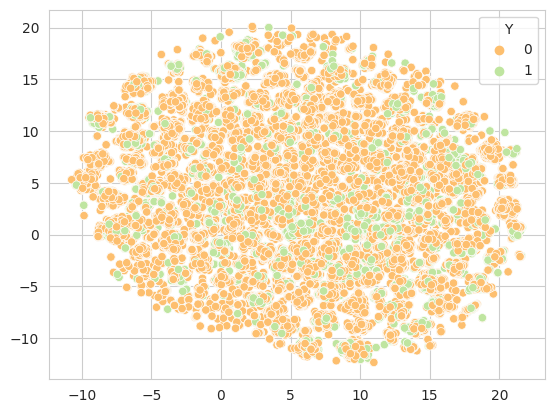

In [ ]:
# plot UMAP
import seaborn as sns

sns.scatterplot(x=umap_obj.embedding_[:, 0], y=umap_obj.embedding_[:, 1], hue = df_binarized_y_train, palette='Spectral')

## KMeans clustering

KMeans clustering is employed on drug descriptors as a method for grouping similar compounds based on their molecular features. This unsupervised learning technique divides the drug dataset into distinct clusters, where compounds within the same cluster share common characteristics. By identifying these clusters, KMeans clustering aids in recognizing patterns and relationships among drugs,

<Axes: >

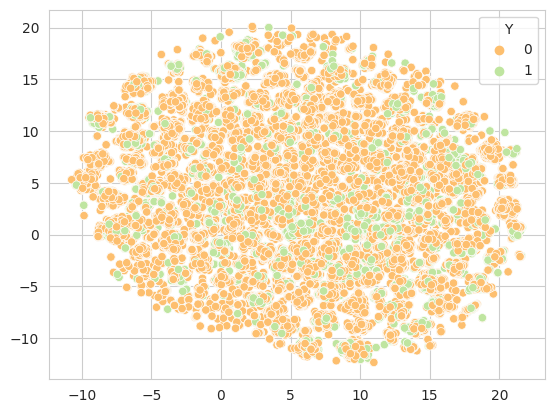

In [ ]:
#performing KMeans clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42).fit(selected_descriptors_train)
kmeans.labels_

#plotting KMeans
sns.scatterplot(x=umap_obj.embedding_[:, 0], y=umap_obj.embedding_[:, 1],hue=df_binarized_y_train, palette='Spectral')

In [ ]:
selected_descriptors_train

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,0.475223,-2.673465,0.475223,-0.827907,-1.074454,0.283129,0.323298,0.284897,0.327081,-0.012625,...,-0.320827,-0.204470,-1.319839,-0.259093,-0.245696,0.556951,1.962255,2.954070,1.913366,1.251184
1,0.284234,0.482771,0.284234,-0.555323,1.255693,-0.588598,-0.614192,-0.587326,-0.456212,-0.012625,...,-0.499328,1.128231,0.298372,0.399539,0.008030,-0.548365,-0.532070,-0.416336,-0.258673,-0.347929
2,1.085605,0.159811,1.085605,-1.010388,0.264612,0.587944,0.574542,0.585240,0.571860,-0.012625,...,0.127308,-1.486476,0.153756,0.374260,0.459798,1.290983,0.195849,-0.592067,-0.615289,-0.431825
3,1.133378,0.097159,1.133378,-0.246975,-0.081599,-0.007272,-0.002274,-0.005625,0.082302,-0.012625,...,0.532513,-1.999913,0.113615,0.188297,0.572505,0.919699,0.526118,-0.153081,-0.509241,-0.309370
4,0.759287,-2.648092,0.759287,-0.913936,-1.262007,1.175268,1.133108,1.176966,1.306197,-0.012625,...,-0.553556,0.237757,0.159944,0.147742,-0.127051,-1.278129,-0.473413,-0.415113,-0.755446,-0.490069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94120,0.549396,0.379806,0.549396,-0.712884,1.088085,-0.363045,-0.416547,-0.361880,-0.211433,-0.012625,...,0.076846,-0.992209,-1.328592,-0.863473,-0.981345,0.364907,-0.214299,0.007111,-0.326251,-0.523634
94121,0.575646,0.395824,0.575646,0.092465,-1.774535,1.006333,1.005004,1.007721,1.061418,-0.012625,...,-0.414973,0.802046,0.130731,-0.102021,0.239583,-0.232560,-0.375690,0.826506,0.558352,0.036104
94122,0.741677,0.176825,0.741677,-0.966591,-0.939010,0.431989,0.509824,0.424889,0.131257,-0.012625,...,-0.386353,-2.073102,-1.885929,-1.613675,-1.225544,0.556951,2.544602,2.297946,1.472475,1.295905
94123,-0.247119,0.362620,-0.247119,-0.367142,1.293926,-1.508433,-1.522766,-1.506885,-1.337417,-0.012625,...,0.239530,1.400870,1.183131,0.507838,0.884899,1.423279,0.322395,-0.308923,-0.446251,-0.528661


In [ ]:
selected_descriptors_test

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,0.396984,0.405350,0.396984,-0.879666,-1.259794,0.988826,0.932475,0.990389,1.138285,-0.009219,...,-0.003013,0.072374,0.544383,0.679614,0.379128,0.792080,-0.301653,-0.664588,-0.947155,-0.896695
1,0.274488,0.176841,0.274488,-0.167826,1.337459,0.199720,0.184299,0.196859,0.197537,-0.009219,...,-0.485929,-0.001726,-0.491685,-0.260419,-0.445738,-1.390492,-0.560459,-0.230429,-0.546076,-0.311497
2,0.397070,0.471674,0.397070,-0.573070,0.499314,-0.205419,-0.275695,-0.204043,-0.011518,-0.009219,...,1.466044,0.307693,1.284844,1.279103,0.875464,1.421174,-0.331798,-1.126224,-1.290400,-0.477028
3,0.652126,-0.012974,0.652126,-0.420754,-1.253576,1.008555,0.974666,1.010135,1.138285,-0.009219,...,-0.358806,0.784961,0.960722,1.242129,1.313736,-0.508904,-0.421158,-0.273288,-0.877100,-1.026714
4,0.047289,0.230188,0.047289,1.280990,1.140249,-0.777765,-0.805571,-0.776402,-0.638683,-0.009219,...,-0.197834,0.088946,-0.161560,-0.512537,-1.101932,1.164401,0.361708,-0.025901,-0.558485,-0.320675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23527,-0.171690,0.082304,-0.171690,1.050989,-0.351859,0.564108,0.707991,0.565996,-0.638683,-0.009219,...,-0.221905,0.468519,0.219649,0.436092,0.253024,0.291372,-0.293678,0.193004,-0.220880,-0.438986
23528,-0.894419,0.562072,-0.894419,-0.985205,-0.154968,0.215600,0.190399,0.217203,0.354329,-0.009219,...,-0.346019,0.862533,0.912751,1.271042,2.051040,-0.675807,-0.647783,-0.504426,-1.152846,-1.479332
23529,0.191187,0.484881,0.191187,-0.778479,2.086907,-0.687420,-0.742159,-0.685775,-0.481892,-0.009219,...,-0.844731,-0.803800,-1.009969,-1.238990,-1.343865,-1.518879,-0.192667,-0.149412,0.051106,0.100614
23530,-2.708160,1.077075,-2.708160,2.799823,1.297269,-0.800001,-0.743662,-0.807867,-1.318112,-0.009219,...,-0.338496,-1.582517,-1.463663,-0.829844,-0.591396,0.359845,1.281555,1.273472,0.736393,0.537210


In [ ]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

model_rf.fit(selected_descriptors_train, df_binarized_y_train)

predictions = model_rf.predict(selected_descriptors_test)

accuracy = accuracy_score(df_binarized_y_test, predictions)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(df_binarized_y_test, predictions))

predictions = model_rf.predict_proba(selected_descriptors_test)
predictions = predictions[:, 1]
print("AUROC for Random Forest:", roc_auc_score(df_binarized_y_test, predictions))

Accuracy: 0.8859425463199048
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     19065
           1       0.86      0.48      0.61      4467

    accuracy                           0.89     23532
   macro avg       0.87      0.73      0.77     23532
weighted avg       0.88      0.89      0.87     23532

AUROC for Random Forest: 0.9216977478165346


In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42)
model_lr.fit(selected_descriptors_train, df_binarized_y_train)

predictions = model_lr.predict(selected_descriptors_test)

accuracy = accuracy_score(df_binarized_y_test, predictions)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(df_binarized_y_test, predictions))

predictions = model_lr.predict_proba(selected_descriptors_test)
predictions = predictions[:, 1]
print("AUROC for LogisticRegression:", roc_auc_score(df_binarized_y_test, predictions))

Accuracy: 0.8310385857555669
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90     19065
           1       0.63      0.27      0.38      4467

    accuracy                           0.83     23532
   macro avg       0.74      0.62      0.64     23532
weighted avg       0.81      0.83      0.80     23532

AUROC for LogisticRegression: 0.7909622160846058


In [ ]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(selected_descriptors_train, df_binarized_y_train)

predictions = model_knn.predict(selected_descriptors_test)

accuracy = accuracy_score(df_binarized_y_test, predictions)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(df_binarized_y_test, predictions))

predictions = model_knn.predict_proba(selected_descriptors_test)
predictions = predictions[:, 1]
print("AUROC for Kneighbors:", roc_auc_score(df_binarized_y_test, predictions))

Accuracy: 0.846209416964134
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91     19065
           1       0.61      0.53      0.57      4467

    accuracy                           0.85     23532
   macro avg       0.75      0.72      0.74     23532
weighted avg       0.84      0.85      0.84     23532

AUROC for Kneighbors: 0.8029335387268385


In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(selected_descriptors_train, df_binarized_y_train)

predictions = model_dt.predict(selected_descriptors_test)

accuracy = accuracy_score(df_binarized_y_test, predictions)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(df_binarized_y_test, predictions))

predictions = model_dt.predict_proba(selected_descriptors_test)
predictions = predictions[:, 1]
print("AUROC for DecisionTreeClassifier:", roc_auc_score(df_binarized_y_test, predictions))

Accuracy: 0.8023542410334863
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88     19065
           1       0.48      0.51      0.50      4467

    accuracy                           0.80     23532
   macro avg       0.68      0.69      0.69     23532
weighted avg       0.81      0.80      0.80     23532

AUROC for DecisionTreeClassifier: 0.6914525678327258


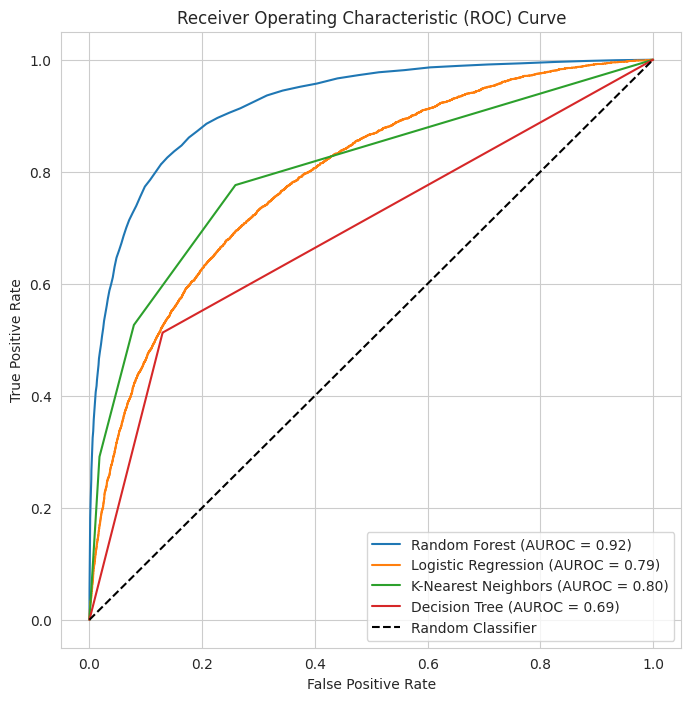

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

predictions_rf = model_rf.predict_proba(selected_descriptors_test)[:, 1]
predictions_lr = model_lr.predict_proba(selected_descriptors_test)[:, 1]
predictions_knn = model_knn.predict_proba(selected_descriptors_test)[:, 1]
predictions_dt = model_dt.predict_proba(selected_descriptors_test)[:, 1]

# Calculate ROC curves and AUROC scores
fpr_rf, tpr_rf, _ = roc_curve(df_binarized_y_test, predictions_rf)
fpr_lr, tpr_lr, _ = roc_curve(df_binarized_y_test, predictions_lr)
fpr_knn, tpr_knn, _ = roc_curve(df_binarized_y_test, predictions_knn)
fpr_dt, tpr_dt, _ = roc_curve(df_binarized_y_test, predictions_dt)

auroc_rf = auc(fpr_rf, tpr_rf)
auroc_lr = auc(fpr_lr, tpr_lr)
auroc_knn = auc(fpr_knn, tpr_knn)
auroc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUROC = {auroc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUROC = {auroc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUROC = {auroc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUROC = {auroc_dt:.2f})')

# Plot the diagonal (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
from pprint import pprint

# accuracy on test set
model_lr.score(selected_descriptors_test, df_binarized_y_test)

# other metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model_lr.predict(selected_descriptors_test)
pprint(classification_report(df_binarized_y_test, y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.85      0.96      0.90     19065\n'
 '           1       0.62      0.30      0.40      4467\n'
 '\n'
 '    accuracy                           0.83     23532\n'
 '   macro avg       0.74      0.63      0.65     23532\n'
 'weighted avg       0.81      0.83      0.81     23532\n')


## Emsembles


In [ ]:
# Bagging
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42), n_estimators=10, random_state=42)
bagging.fit(selected_descriptors_train, df_binarized_y_train)
print('Accuracy on test set:', bagging.score(selected_descriptors_test, df_binarized_y_test ))
print('Classification report:\n', classification_report(df_binarized_y_test , bagging.predict(selected_descriptors_test)))
print('Confusion matrix:\n', confusion_matrix(df_binarized_y_test , bagging.predict(selected_descriptors_test)))
print('ROC AUC score:', roc_auc_score(df_binarized_y_test , bagging.predict_proba(selected_descriptors_test)[::,1]))

Accuracy on test set: 0.8791007989121197
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     19065
           1       0.87      0.43      0.57      4467

    accuracy                           0.88     23532
   macro avg       0.87      0.71      0.75     23532
weighted avg       0.88      0.88      0.86     23532

Confusion matrix:
 [[18777   288]
 [ 2557  1910]]
ROC AUC score: 0.9177076865983027


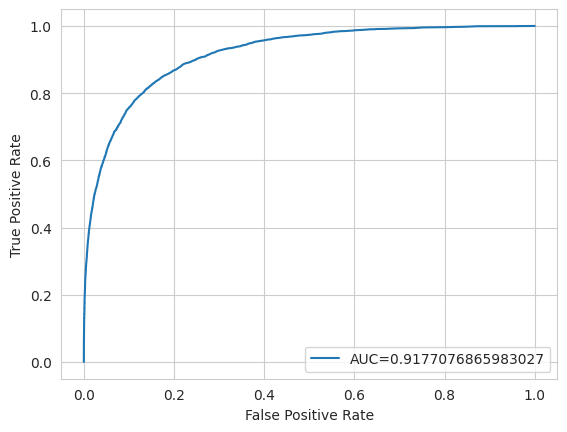

Feature ranking:
1. feature 21 (0.009027920485364292)
2. feature 89 (0.008688069938707821)
3. feature 95 (0.00797209666114061)
4. feature 85 (0.00776945889976998)
5. feature 45 (0.007630356902061705)
6. feature 60 (0.007465200221606804)
7. feature 18 (0.007311480870032099)
8. feature 11 (0.007273289199107938)
9. feature 25 (0.0072707756127376845)
10. feature 4 (0.007244381831518921)
11. feature 20 (0.00721673186206394)
12. feature 40 (0.007163214200345966)
13. feature 22 (0.007154173531940736)
14. feature 57 (0.00712035966042449)
15. feature 2 (0.007084212666606775)
16. feature 23 (0.007079491065107303)
17. feature 94 (0.00702226923203083)
18. feature 12 (0.007012152117650614)
19. feature 97 (0.006921590327561849)
20. feature 24 (0.006915940690941397)
21. feature 0 (0.0067880673930122044)
22. feature 13 (0.006779720472739671)
23. feature 37 (0.006768510900583797)
24. feature 69 (0.006656378410788924)
25. feature 19 (0.006624360967476227)
26. feature 66 (0.0065902940954117055)
27. featu

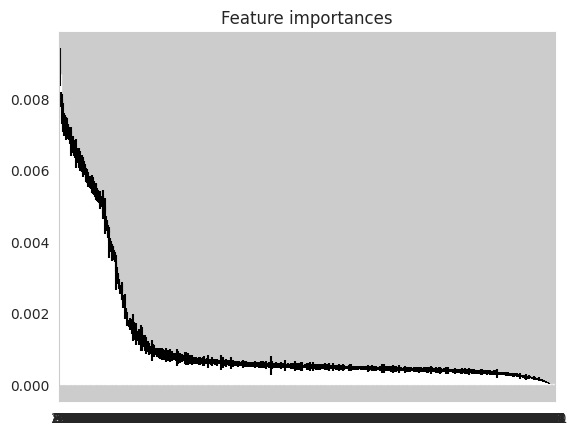

In [ ]:
# plot ROC curve
y_pred_proba = bagging.predict_proba(selected_descriptors_test)[::,1]
fpr, tpr, _ = roc_curve(df_binarized_y_test,  y_pred_proba)
auc = roc_auc_score(df_binarized_y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


# plot feature importance
importances = bagging.estimators_[0].feature_importances_
std = np.std([tree.feature_importances_ for tree in bagging.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(selected_descriptors_train.shape[1]):
    print(f"{f+1}. feature {indices[f]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(selected_descriptors_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(selected_descriptors_train.shape[1]), indices)
plt.xlim([-1, selected_descriptors_train.shape[1]])
plt.show()

In [ ]:
# Boosting
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(selected_descriptors_train, df_binarized_y_train)
print('Accuracy on test set:', adaboost.score( selected_descriptors_test, df_binarized_y_test))
print('Classification report:\n', classification_report(df_binarized_y_test, adaboost.predict( selected_descriptors_test)))
print('Confusion matrix:\n', confusion_matrix(df_binarized_y_test, adaboost.predict( selected_descriptors_test)))
print('ROC AUC score:', roc_auc_score(df_binarized_y_test, adaboost.predict_proba( selected_descriptors_test)[::,1]))

Accuracy on test set: 0.829763725990141
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90     19065
           1       0.65      0.22      0.33      4467

    accuracy                           0.83     23532
   macro avg       0.75      0.60      0.62     23532
weighted avg       0.81      0.83      0.79     23532

Confusion matrix:
 [[18529   536]
 [ 3470   997]]
ROC AUC score: 0.7946988819310841


## Model Validation

In [ ]:
# Model validation
from sklearn.model_selection import cross_val_score

# cross validation
scores = cross_val_score(model_lr, selected_descriptors_train, df_binarized_y_train, cv=5)
print('Cross validation scores:', scores)
print('Mean cross validation score:', scores.mean())

Cross validation scores: [0.82730412 0.83250996 0.82810093 0.82932271 0.82948207]
Mean cross validation score: 0.8293439575033201


# Model interpretation

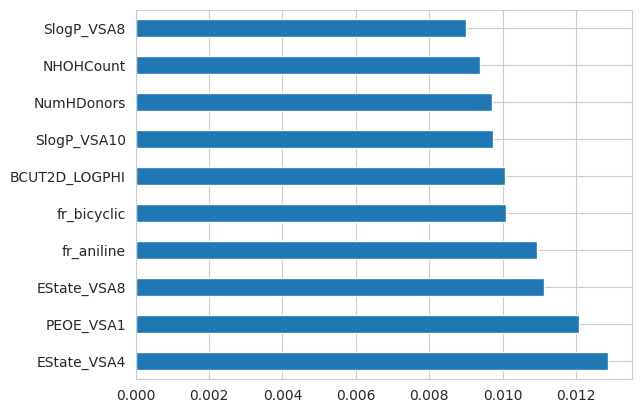

In [ ]:
# Model interpretation
# feature importance
rf = RandomForestClassifier(random_state=42, n_estimators=1000, max_depth=10, max_features='sqrt', min_samples_split=5, min_samples_leaf=2)
rf.fit(selected_descriptors_train, df_binarized_y_train)
rf.feature_importances_

# plot feature importance
importances = pd.Series(rf.feature_importances_, index=selected_columns)
importances.nlargest(10).plot(kind='barh')
plt.show()

# Deep Learning

In [ ]:
# run deep learning model using keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Build the model

model = keras.Sequential(
    [
        layers.Dense(512, activation="relu", name="layer1"),
        layers.Dense(256, activation="relu", name="layer2"),
        layers.Dense(1, activation="sigmoid", name="layer3"),
    ]
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
model.fit(selected_descriptors_train, df_binarized_y_train, epochs=100, batch_size=32)

predictions = model.predict(selected_descriptors_test)
predictions



Epoch 1/100
2942/2942 [==============================] - 13s 4ms/step - loss: 0.3889 - accuracy: 0.8348
Epoch 2/100
2942/2942 [==============================] - 10s 3ms/step - loss: 0.3362 - accuracy: 0.8575
Epoch 3/100
2942/2942 [==============================] - 10s 3ms/step - loss: 0.3118 - accuracy: 0.8672
Epoch 4/100
2942/2942 [==============================] - 10s 3ms/step - loss: 0.2899 - accuracy: 0.8764
Epoch 5/100
2942/2942 [==============================] - 10s 3ms/step - loss: 0.2731 - accuracy: 0.8830
Epoch 6/100
2942/2942 [==============================] - 11s 4ms/step - loss: 0.2589 - accuracy: 0.8899
Epoch 7/100
2942/2942 [==============================] - 9s 3ms/step - loss: 0.2442 - accuracy: 0.8960
Epoch 8/100
2942/2942 [==============================] - 10s 4ms/step - loss: 0.2332 - accuracy: 0.8998
Epoch 9/100
2942/2942 [==============================] - 10s 3ms/step - loss: 0.2199 - accuracy: 0.9044
Epoch 10/100
2942/2942 [==============================] - 10s 3ms

array([[2.3065181e-15],
       [7.4560876e-07],
       [1.0797942e-23],
       ...,
       [5.3555667e-08],
       [1.4375055e-03],
       [9.4275820e-10]], dtype=float32)

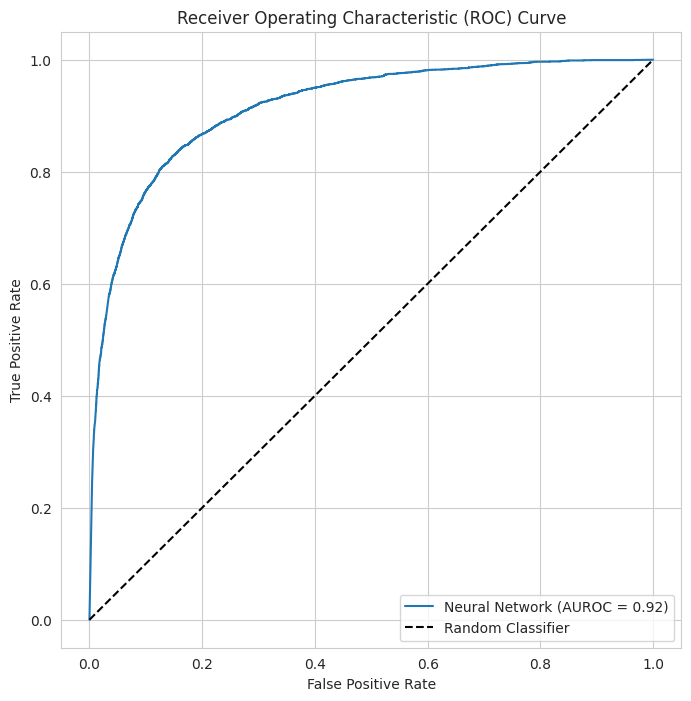

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUROC score
fpr, tpr, _ = roc_curve(df_binarized_y_test, predictions)
auroc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'Neural Network (AUROC = {auroc:.2f})')

# Plot the diagonal (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()